In [1]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()



In [2]:
!wget https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/scan.jpeg

--2022-09-07 13:49:34--  https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/scan.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 171933 (168K) [image/jpeg]
Saving to: ‘scan.jpeg’

scan.jpeg           100%[===================>] 167.90K  --.-KB/s    in 0.009s  

2022-09-07 13:49:34 (19.1 MB/s) - ‘scan.jpeg’ saved [171933/171933]



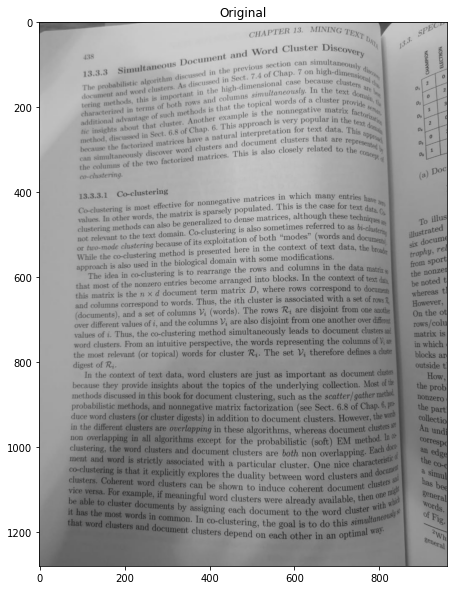

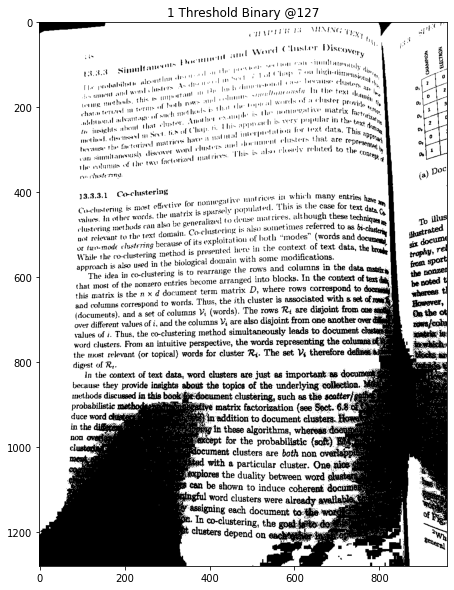

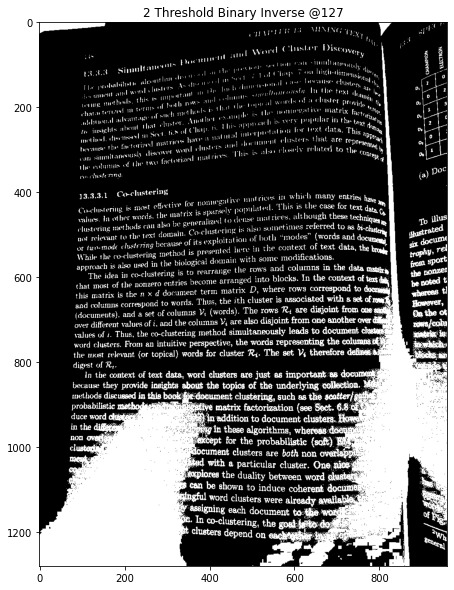

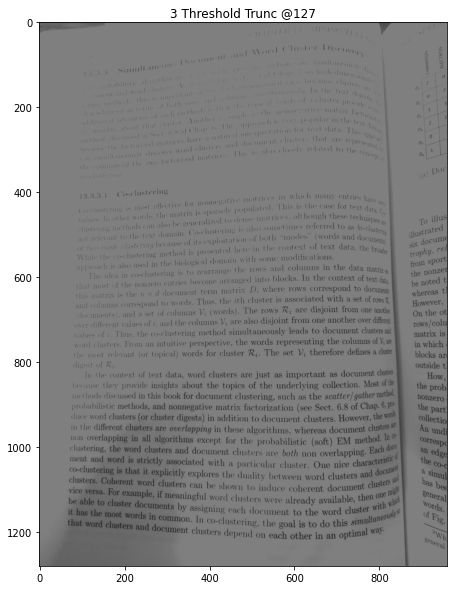

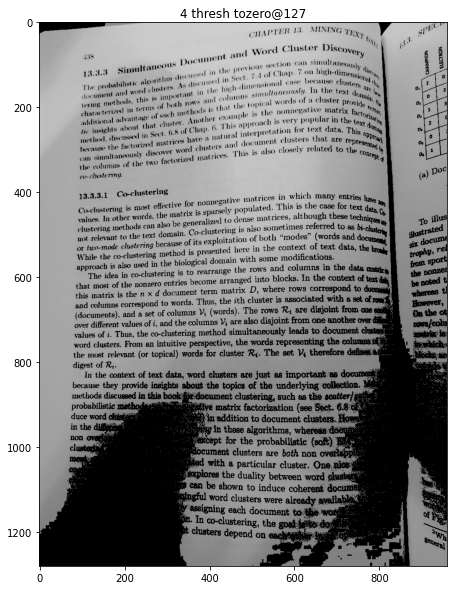

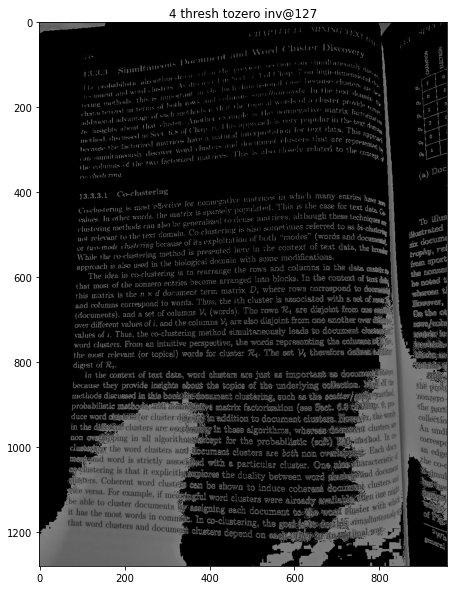

In [3]:
image = cv2.imread('scan.jpeg',0)
imshow('Original', image)

ret, thresh1 =  cv2.threshold(image , 127, 255 , cv2.THRESH_BINARY)
imshow('1 Threshold Binary @127', thresh1)

ret, thresh2 = cv2.threshold(image, 127,255,cv2.THRESH_BINARY_INV)
imshow('2 Threshold Binary Inverse @127', thresh2)

ret, thresh3 = cv2.threshold(image, 127,255,cv2.THRESH_TRUNC)
imshow('3 Threshold Trunc @127', thresh3)

ret, thresh4=cv2.threshold(image, 127,255,cv2.THRESH_TOZERO)
imshow('4 thresh tozero@127', thresh4)

ret, thresh5=cv2.threshold(image, 127,255,cv2.THRESH_TOZERO_INV)
imshow('4 thresh tozero inv@127', thresh5)

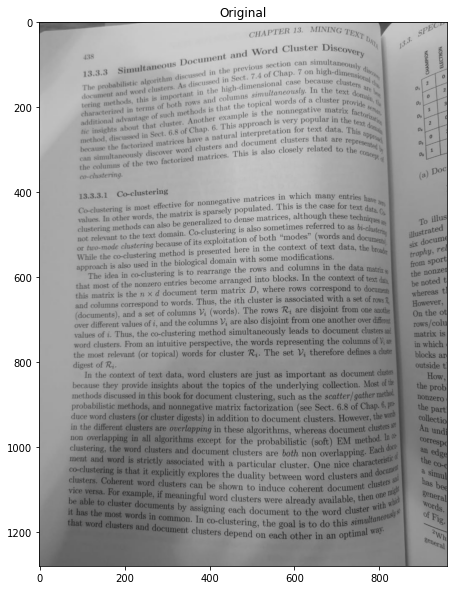

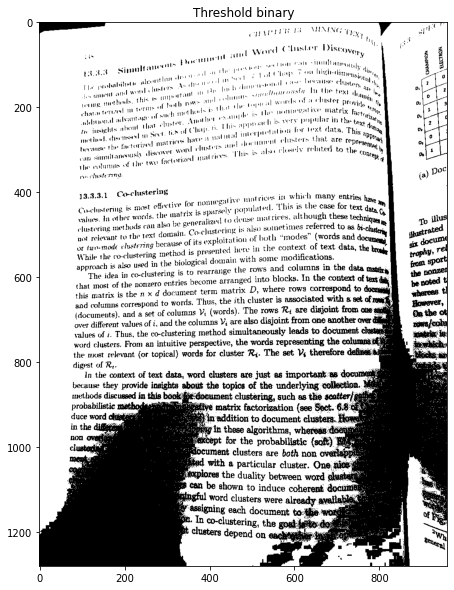

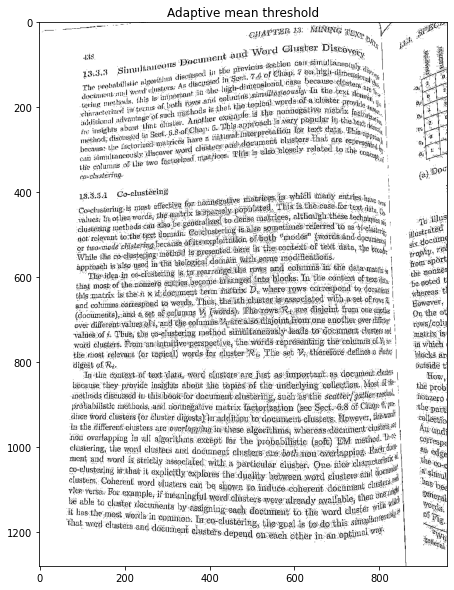

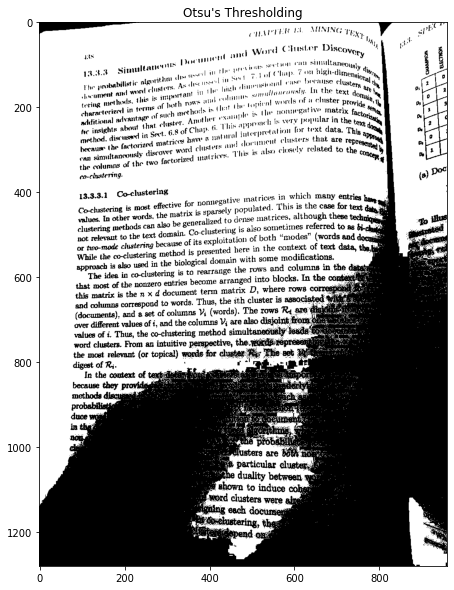

In [4]:
image = cv2.imread('scan.jpeg',0)
imshow("Original", image)

ret , thresh1 = cv2.threshold(image, 127 , 255 , cv2.THRESH_BINARY)
imshow('Threshold binary', thresh1)

thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3,5)
imshow('Adaptive mean threshold', thresh)

_, th2 = cv2.threshold(image, 0,255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow("Otsu's Thresholding", th2)

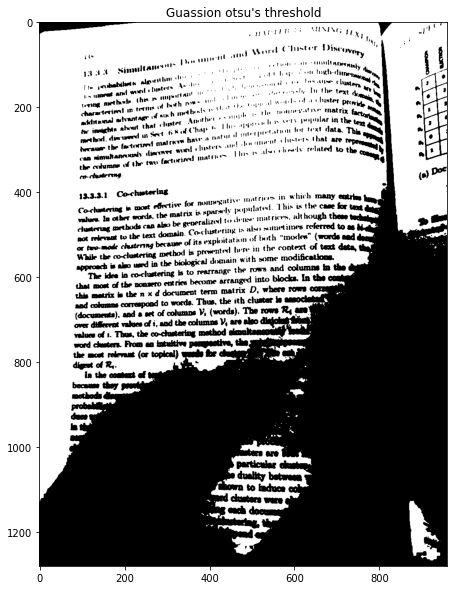

In [ ]:
blur= cv2.GaussianBlur(image,(5,5),0)
_, th3 = cv2.threshold(blur , 0, 255 , cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow("Guassion otsu's threshold", th3)

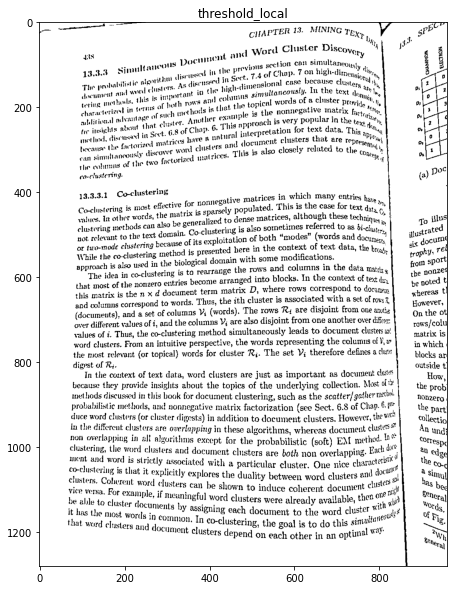

In [6]:
from skimage.filters import threshold_local

image = cv2.imread('scan.jpeg')

V = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2HSV))[2]
T = threshold_local(V, 25 , offset=15, method="gaussian")

thresh= (V > T).astype("uint8") * 255
imshow("threshold_local", thresh)